# 1. Acquire

In [2]:
# Import Python Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Acquire and Prep Files
import Acquire
import os 
# Add prep.py file

# Import for model object and metric functions
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Import Warnings 
import warnings
warnings.filterwarnings("ignore")

print('Imports Completed.')

Imports Completed.


In [3]:
df = Acquire.get_mvp_home_data() 

In [4]:
df.head()

,id,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,taxvaluedollarcnt
0,1018,1819.0,3.0,2.0,478430.0
1,1248,1000.0,0.0,0.0,27400.0
2,1734,1503.0,2.0,2.0,171687.0
3,1772,1604.0,4.0,2.0,498347.0
4,2028,2384.0,3.0,3.0,549917.0


# 2. Prepare

In [5]:
df.shape

(19149, 5)

In [6]:
df.describe() 

,id,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,taxvaluedollarcnt
count,19149.000000,18783.000000,19149.000000,19149.000000,1.884100e+04
mean,52465.910805,1784.874621,3.006632,2.205833,4.443516e+05
std,6396.665259,965.575765,1.148385,1.035924,5.547795e+05
min,1018.000000,60.000000,0.000000,0.000000,1.000000e+01
25%,47163.000000,1204.000000,2.000000,2.000000,1.925360e+05
50%,52742.000000,1557.000000,3.000000,2.000000,3.294930e+05
75%,57785.000000,2102.500000,4.000000,3.000000,5.280000e+05
max,62970.000000,26345.000000,10.000000,19.500000,1.717000e+07


In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19149 entries, 0 to 19148
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            19149 non-null  int64  
 1   calculatedfinishedsquarefeet  18783 non-null  float64
 2   bedroomcnt                    19149 non-null  float64
 3   bathroomcnt                   19149 non-null  float64
 4   taxvaluedollarcnt             18841 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 897.6 KB


In [8]:
df.isnull().sum() 

id                                0
calculatedfinishedsquarefeet    366
bedroomcnt                        0
bathroomcnt                       0
taxvaluedollarcnt               308
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum() 

id                              0
calculatedfinishedsquarefeet    0
bedroomcnt                      0
bathroomcnt                     0
taxvaluedollarcnt               0
dtype: int64

<b>Takeaways: </b>
- There are some definite outliers in the dataset on the low end of square feet and tax value
- Still not sure whether 0 bedroom/ 0 bathroom is refering to a studio apartment or some other situation

# 3. Explore

### Continuous and Continuous Variables  

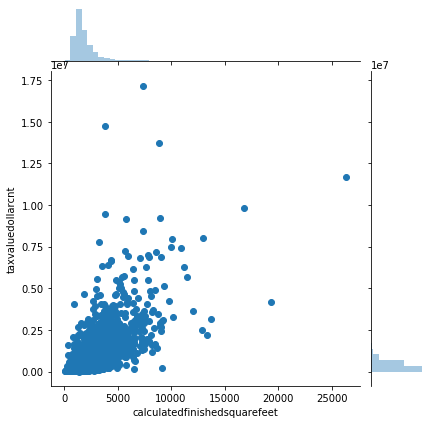

In [11]:
sns.jointplot(x= 'calculatedfinishedsquarefeet', y='taxvaluedollarcnt', data=df)

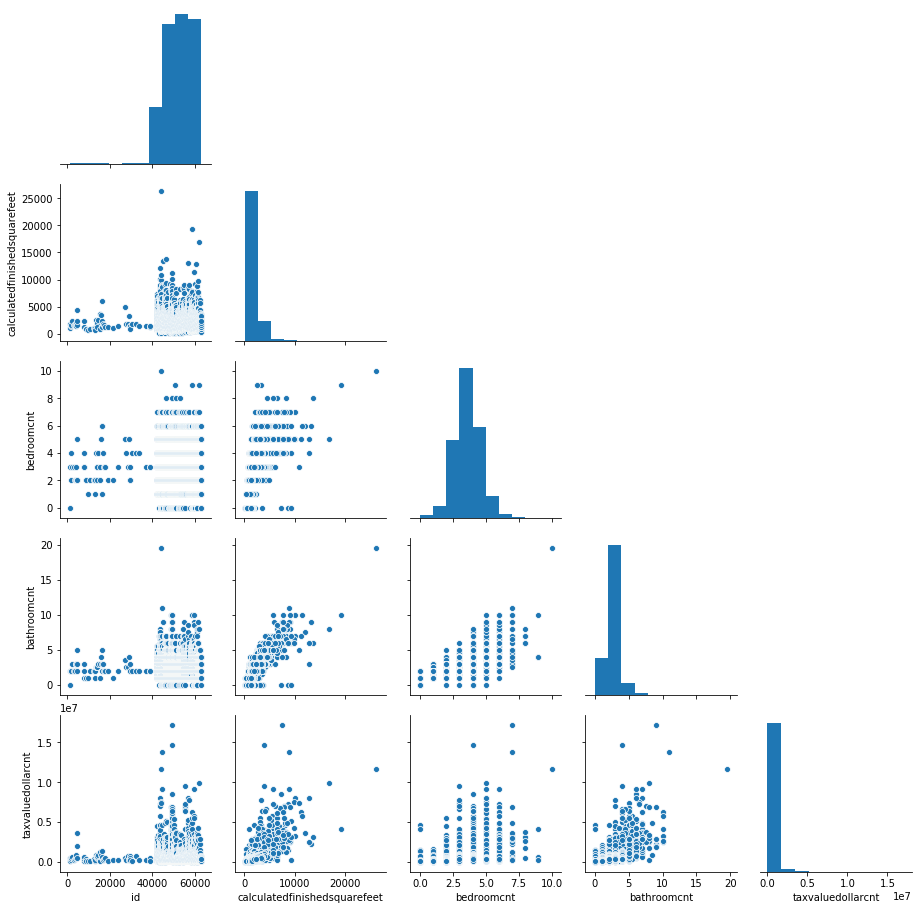

In [12]:
sns.pairplot(df, corner=True) 

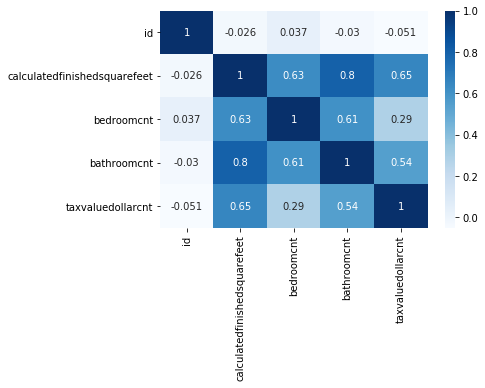

In [12]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)

### Continuous and Categorical Variables

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

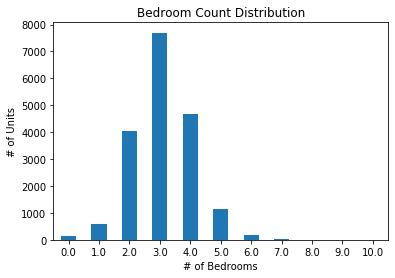

In [13]:
df.bedroomcnt.value_counts().sort_index().plot.bar(title='Bedroom Count Distribution')
plt.xlabel('# of Bedrooms')
plt.ylabel('# of Units')
plt.xticks(rotation=0) 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

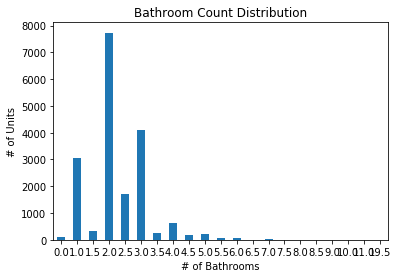

In [14]:
df.bathroomcnt.value_counts().sort_index().plot.bar(title='Bathroom Count Distribution')
plt.xlabel('# of Bathrooms')
plt.ylabel('# of Units') 
plt.xticks(rotation=0) 

### Categorical and Categorical Variables

(0, 25)

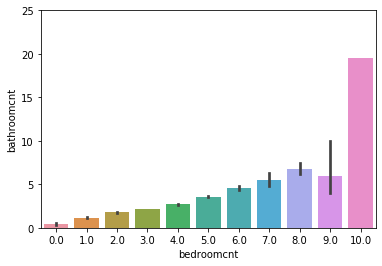

In [15]:
sns.barplot(data=df, x='bedroomcnt', y='bathroomcnt')
plt.ylim(0,25) 

In [16]:
pd.crosstab(df.bedroomcnt, df.bathroomcnt, normalize='index') 

bathroomcnt,0.0,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,...,6.0,6.5,7.0,7.5,8.0,8.5,9.0,10.0,11.0,19.5
bedroomcnt,,,,,,,,,,,,,,,,,,,,,
0.0,0.650407,0.308943,0.000000,0.040650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1.0,0.000000,0.831405,0.021488,0.133884,0.006612,0.006612,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2.0,0.000248,0.356912,0.032018,0.435592,0.063788,0.107471,0.001737,0.001986,0.000000,0.000248,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3.0,0.000130,0.131220,0.018319,0.527738,0.114980,0.181499,0.009874,0.012732,0.001559,0.001819,...,0.000130,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4.0,0.000644,0.009225,0.006651,0.368161,0.114997,0.371594,0.029822,0.059000,0.015876,0.016949,...,0.002575,0.000000,0.001073,0.000215,0.000215,0.000000,0.000000,0.000000,0.000000,0.0
5.0,0.000876,0.006135,0.003506,0.094654,0.038563,0.417178,0.041192,0.164768,0.058720,0.088519,...,0.031551,0.002629,0.010517,0.001753,0.001753,0.000876,0.002629,0.000876,0.000000,0.0
6.0,0.000000,0.005319,0.000000,0.047872,0.010638,0.218085,0.005319,0.260638,0.037234,0.148936,...,0.085106,0.015957,0.085106,0.005319,0.015957,0.005319,0.010638,0.010638,0.000000,0.0
7.0,0.000000,0.000000,0.000000,0.000000,0.027027,0.081081,0.027027,0.297297,0.027027,0.216216,...,0.027027,0.027027,0.081081,0.000000,0.054054,0.000000,0.054054,0.054054,0.027027,0.0
8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.400000,0.000000,0.400000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.0


<b>Takeaways: </b>
- What independent variables are correlated with the dependent? 
- Which independent variables are correlated with other independent variables?

### Scale Data

### Train, Validate, and Test

In [ ]:
# split into train, validate, and test sets
train_and_validate, test = train_test_split(df, random_state=123)
train, validate = train_test_split(train_and_validate, random_state=123)

In [ ]:
# Split into X and y
X_train = train.drop(columns='taxvaluedollarcnt')
y_train = train[['taxvaluedollarcnt']]

# Validate split
X_validate = validate.drop(columns='taxvaluedollarcnt')
y_validate = validate[['taxvaluedollarcnt']]

# Test split
X_test = test.drop(columns='taxvaluedollarcnt')
y_test = test[['taxvaluedollarcnt']]

### Run Tests

- T-test 
- Correlation test

### T-test

### Correlation Test

# 4. Model

- Develop a regression model that performs better than a baseline 
- Extablish a baseline model
- Document various algorithms and/or hyperparameters
- Plot the residuals
- Compute the evaluation metrics (SSE, RMSE, and/or MSE)
- Compare to baseline
- Plot y by ^y
- Create a model.py file

### Baseline Model

# 5. Conclusions